# Naive Bayesian discriminant

See: https://scikit-learn.org/stable/modules/naive_bayes.html

Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import numpy as np
from ROOT import *
from array import array

from sklearn.naive_bayes import GaussianNB

# For plot
from IPython.display import Image

Welcome to JupyROOT 6.24/04


### (1) ROOT settings

In [2]:
# Set ROOT graphics options

gROOT.SetStyle("Plain")

# Default canvas  size

gStyle.SetCanvasDefW(600)
gStyle.SetCanvasDefH(400)
 
# set the margins
  
gStyle.SetPadBottomMargin(0.18)
gStyle.SetPadTopMargin(0.08)
gStyle.SetPadRightMargin(0.08)
gStyle.SetPadLeftMargin(0.17)

# set the number of divisions to show

gStyle.SetNdivisions(510, "xy")

# show grid

gStyle.SetPadGridX(1)
gStyle.SetPadGridY(1)

# border ploted only around statistics

gStyle.SetPadBorderMode(0)
gStyle.SetFrameBorderMode(0)
gStyle.SetLegendBorderSize(0)
gStyle.SetTitleBorderSize(0)
gStyle.SetStatBorderSize(1)

# Text sizes

gStyle.SetTextSize(0.05)
gStyle.SetTitleSize(0.06,"xyz")
gStyle.SetLabelSize(0.05,"xyz")

gStyle.SetLabelOffset(0.015,"xyz")
gStyle.SetTitleOffset(1.2,"yz")
gStyle.SetTitleOffset(1.0,"x")

# Font settings

font = 42
gStyle.SetTitleFont(font)
gStyle.SetTitleFontSize(0.05)
gStyle.SetStatFont(font)
gStyle.SetStatFontSize(0.06)
gStyle.SetTextFont(font)
gStyle.SetLabelFont(font,"xyz")
gStyle.SetTitleFont(font,"xyz")
gStyle.SetLegendFont(font)

# Line settings

gStyle.SetHistLineWidth(2)
gStyle.SetFrameLineWidth(2)
gStyle.SetFuncWidth(2)
gStyle.SetHistLineColor(kBlue)
gStyle.SetFuncColor(kRed)

# Log scale
gStyle.SetOptLogy(0)

# Histogram title
gStyle.SetOptTitle(1)  

# Histogram statistics
gStyle.SetOptStat(1100)

# Fit results
gStyle.SetOptFit(0) 

### (2) Define 2D sample generation procedure

In [3]:
def mydata(Nmc,pos,sig,corr=0.0):

    data = np.empty(shape=(Nmc,2))
    
    phi = 0.5*asin(corr)

    g = np.random.normal(size=(2,Nmc))

    data[:,0] = pos[0] + sig[0]*(g[0]*cos(phi) + g[1]*sin(phi))
    data[:,1] = pos[1] + sig[1]*(g[0]*sin(phi) + g[1]*cos(phi))
    
    return data

### (3) Generating train and test data

In [4]:
# Sample size

Ntrain = 100
Ntest = 100

# Two hypothesis

h1 = np.array([-1.,-1.])
h2 = np.array([1.,1.])

# Fraction of first hypothesis

fh1 = 0.5

# Measurement uncertainties

sig = np.array([1.2,0.6])
corr = 0.

# Generate train sample 
# ---------------------

h1train = mydata(Ntrain,h1,sig,corr)
h2train = mydata(Ntrain,h2,sig,corr)

# Uniform distributed numbers

rtrain = np.random.uniform(size=Ntrain)

# Mix of two hypothesis

y_train = rtrain > fh1

y2_train = np.resize(np.repeat(y_train,2),(Ntrain,2))

X_train = y2_train * h1train + (1 - y2_train)*h2train

print("Train data defined, size: ",y_train.size)

# Generate test sample 
# --------------------

h1test = mydata(Ntest,h1,sig,corr)
h2test = mydata(Ntest,h2,sig,corr)

# Uniform distributed numbers

rtest = np.random.uniform(size=Ntest)

# Mix of two hypothesis

y_test = rtest > fh1

y2_test = np.resize(np.repeat(y_test,2),(Ntest,2))

X_test = y2_test * h1test + (1 - y2_test)*h2test

print("Test data defined, size: ",y_test.size)


Train data defined, size:  100
Test data defined, size:  100


### (4) Bayesian classifier assuming Gaussian distributions

In [5]:
# Define classifier

gnb = GaussianNB()

gnb.fit(X_train, y_train)

y_train_pred = gnb.predict(X_train)

print("Number of mislabeled training points out of a total %d points : %d"
        % (X_train.shape[0], (y_train != y_train_pred).sum()))

y_test_pred = gnb.predict(X_test)

print("Number of mislabeled test points out of a total %d points : %d"
        % (X_test.shape[0], (y_test != y_test_pred).sum()))


Number of mislabeled training points out of a total 100 points : 2
Number of mislabeled test points out of a total 100 points : 3


### (5) Plot results

In [6]:
# Square plot

gStyle.SetCanvasDefH(600)

# Create plot canvas

cexp = TCanvas('cexp')
   
# Create data graph

tgr = TGraph(y_train.size,array('d',X_train[:,0]),array('d',X_train[:,1]))
rgr = TGraph(y_test.size,array('d',X_test[:,0]),array('d',X_test[:,1]))

# Set graph options

tgr.SetNameTitle("tgr","Train sample      #sigma = "+str(sig)+"    f_{^{1}} = "+str(fh1))
tgr.SetMarkerStyle(20)
tgr.SetMarkerSize(0.8)
tgr.SetMarkerColor(4)

tgr.GetXaxis().SetTitle("x_{1}")
tgr.GetYaxis().SetTitle("x_{2}")

# One of the sets

nt1 = np.sum(y_train==1)

Xt1 = np.zeros(shape=(nt1,2))

it1 = 0
for ip in range(y_train.size):
    if y_train[ip]==1 :
        Xt1[it1]=X_train[ip]
        it1+=1
             
tgr1 = TGraph(int(nt1),array('d',Xt1[:,0]),array('d',Xt1[:,1]))

# Set graph options

rgr.SetNameTitle("rgr","Test sample   #sigma = "+str(sig)+"    f_{^{1}} = "+str(fh1))
rgr.SetMarkerStyle(20)
rgr.SetMarkerSize(0.8)
rgr.SetMarkerColor(4)

rgr.GetXaxis().SetTitle("x_{1}")
rgr.GetYaxis().SetTitle("x_{2}")

# One of the sets

nr1 = np.sum(y_test==1)

Xr1 = np.zeros(shape=(nr1,2))

ir1 = 0
for ip in range(y_test.size):
    if y_test[ip]==1 :
        Xr1[ir1]=X_test[ip]
        ir1+=1
             
rgr1 = TGraph(int(nr1),array('d',Xr1[:,0]),array('d',Xr1[:,1]))

# Set graph options

tgr1.SetNameTitle("tgr1","Train data")
tgr1.SetMarkerStyle(20)
tgr1.SetMarkerSize(0.8)
tgr1.SetMarkerColor(3)
    
# Set graph options

rgr1.SetNameTitle("rgr1","Test data")
rgr1.SetMarkerStyle(20)
rgr1.SetMarkerSize(0.8)
rgr1.SetMarkerColor(3)
    

In [7]:
# Decision histogram (as background)

Xmin = -5.0
Xmax = 5.0
Nbin = 200
dX = (Xmax-Xmin)/Nbin

nbhist = TH2D("nbhist","Bayesian classifier",Nbin,Xmin,Xmax,Nbin,Xmin,Xmax)

for ix in range(Nbin):
    for iy in range(Nbin):
        x1 = Xmin+(ix+0.5)*dX
        x2 = Xmin+(iy+0.5)*dX
        y1 = 1-gnb.predict(np.array([[x1,x2]]))
        nbhist.Fill(x1,x2,y1[0])

# Do not show histogram statistics

nbhist.SetStats(0)
nbhist.GetXaxis().SetTitle("x_{1}")
nbhist.GetYaxis().SetTitle("x_{2}")

nbhist.SetTitle("Train sample      #sigma = "+str(sig)+"    f_{^{1}} = "+str(fh1))

nbhist.Draw("COL")


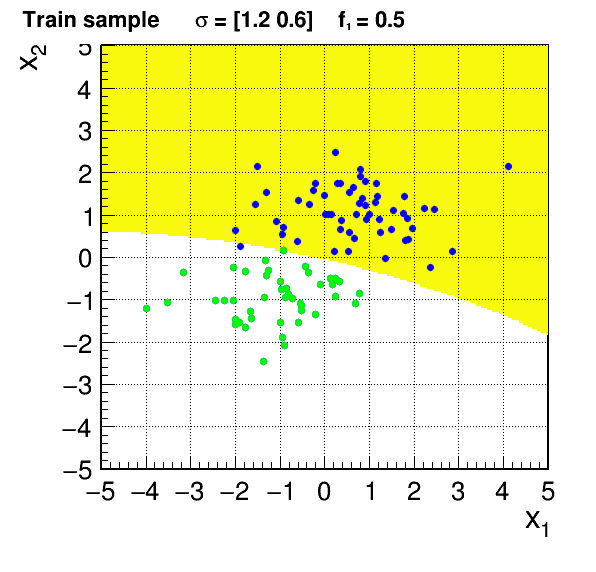

Info in <TCanvas::Print>: png file 11_Bayes_1.2_0.6_0.5_train.png has been created


In [8]:
# Plot 

tgr.Draw('P')
tgr1.Draw('P')

cexp.Update()

fname = '11_Bayes_'+str(sig[0])+'_'+str(sig[1])+'_'+str(fh1)+'_train.png'
    
cexp.Print(fname)

Image(filename=fname)

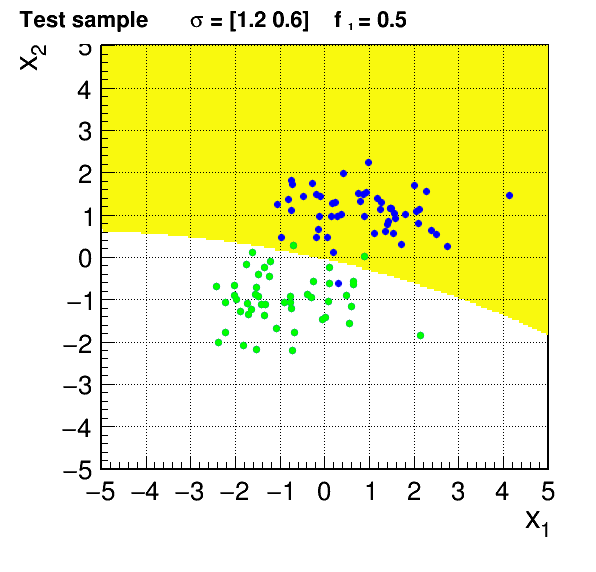

Info in <TCanvas::Print>: png file 11_Bayes_1.2_0.6_0.5_test.png has been created


In [9]:
# Plot 

nbhist.SetTitle("Test sample      #sigma = "+str(sig)+"    f_{^{1}} = "+str(fh1))

nbhist.Draw("COL")

rgr.Draw('P')

rgr1.Draw('P')

cexp.Update()

fname = '11_Bayes_'+str(sig[0])+'_'+str(sig[1])+'_'+str(fh1)+'_test.png'
    
cexp.Print(fname)

Image(filename=fname)